In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
dataSet = pd.read_csv('C:/Users/KHAAN/OneDrive/Desktop/Ml_DAtaSets/Iris.csv')

In [3]:
dataSet.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
dataSet.tail()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataSet.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Find Optimum Number of Clusters

In [7]:
newDataSet = dataSet.iloc[: , [0, 1 , 2 , 3]].values

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , max_iter=250 , random_state = 40)
    kmeans.fit(newDataSet)
    wcss.append(kmeans.inertia_)

“init” argument is the method for initializing the centroid.
We calculated the WCSS value for each K value. Now we have to plot the WCSS with K value

# Observe "The Elbow" by the Help of plot

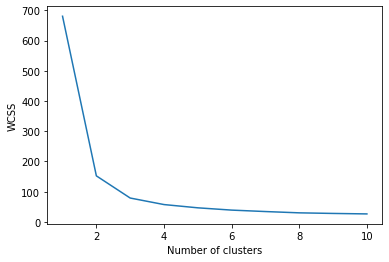

In [9]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

we can see the elbow shape graph due to which this is called "The Elbow method".The optimum cluster is where the elbow occurs. The point at which the elbow shape is created is 3, that is, our K value or an optimal number of clusters is 3.

# Implementation of Model

In [10]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 40)
y_kmeans = kmeans.fit_predict(newDataSet)

In [11]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

# Visual Representation

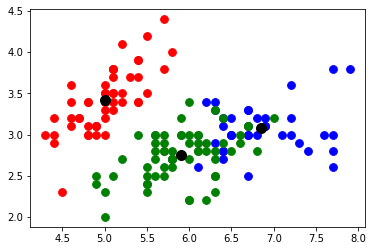

In [12]:
plt.scatter(newDataSet[y_kmeans == 0, 0], newDataSet[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(newDataSet[y_kmeans == 1, 0], newDataSet[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Iris-versicolor')
plt.scatter(newDataSet[y_kmeans == 2, 0], newDataSet[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Iris-virginica')

#plotting The centriods of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

As you can see there are 3 clusters in total which are visualized 
in different colors and the centroid of each cluster is visualized in black color.